<a href="https://colab.research.google.com/github/mahajanashita/breastcancer/blob/main/ybreasycancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/My Drive/breast.csv")
data.fillna(value=0,inplace=True)
data.head()


In [ ]:
av = sns.countplot(data['diagnosis'],label = 'Count')
B,M =data['diagnosis'].value_counts()
print("bengin",B)
print("magligent",M)

In [ ]:
del data["Unnamed: 32"]

In [ ]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values


from sklearn.preprocessing import LabelEncoder
lbx_1=LabelEncoder()
y=lbx_1.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
!pip install keras

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
#adding input and first hidden layer
classifier=Sequential()
classifier.add(Dense(16,activation="relu",input_dim=30))
#second hidden layer
classifier.add(Dense(16,activation="relu"))
#output layer as output 1
classifier.add(Dense(1,activation="sigmoid"))



In [ ]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(x_train ,y_train , batch_size=100, epochs=100)

In [ ]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)

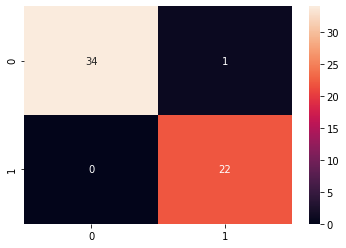

In [ ]:
sns.heatmap(cn,annot=True)
plt.savefig('h.png')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824561403508771

In [ ]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
 
  classifier=Sequential()
  classifier.add(Dense(16,activation="relu",input_dim=30))
  classifier.add(Dense(16,activation="relu"))
  classifier.add(Dense(1,activation="sigmoid"))
  classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
  return classifier

classifier=KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracy =cross_val_score(estimator = classifier,x=x_train,y=y_train,cv=10,n_jobs=-1)


In [ ]:
accuraycvv                                                                                                                                                                                                             

In [2]:
!git clone https://github.com/mahajanashita/breastcancer.git

Cloning into 'breastcancer'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
